In [1]:
'''
Text Mining assignment
1) Perform sentimental analysis on the Elon-musk tweets
'''

'\nText Mining assignment\n1) Perform sentimental analysis on the Elon-musk tweets\n'

In [2]:
import pandas as pd
import string
import numpy as np
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/08/2023  09:08 PM    <DIR>          .
08/02/2023  05:51 PM    <DIR>          ..
08/08/2023  08:52 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
08/02/2023  02:05 PM            30,582 Afinn.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/01/2023  03:25 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:29 PM           182,205 apriori algorithm-my_movies.ipynb
08/02/2023  10:55 AM               247 Assignment.txt
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
07/29/

In [4]:
data=pd.read_csv('Elon_musk.csv', encoding = "ISO-8859-1")

In [5]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
data.shape

(1999, 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [9]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing
data = [Text for Text in data if Text] # removes empty strings, because they are considered  as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [10]:
# Joining the list into one string/text
text = ' '.join(data)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [11]:
# Removing Twitter username(Removes @usernames)
from nltk.tokenize import TweetTokenizer
Tokenizer = TweetTokenizer(strip_handles=True)
tweets_tokens=Tokenizer.tokenize(text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [12]:
tweets_token_text=' '.join(tweets_tokens)
tweets_token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [13]:
#Punctuation
no_punc_text = tweets_token_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [14]:
import re


In [15]:
no_url=re.sub(r'http\S+', '', no_punc_text)
no_url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [16]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [17]:
len(text_tokens)

17847

In [18]:
#Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

sw= ['\x92','rt','ye','yeah','u043c','u044b','u0441','u0434','u0435','u043b','u0430','u0435','u043c','haha','Yes','U0001F923','I','hodl']
stop_words.extend(sw)

no_stop_tokens = [word for word in text_tokens if not word in stop_words]
print(no_stop_tokens[0:40])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld']


In [19]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld']


In [20]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
data1=nlp(' '.join(lower_words))
print(data1)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [21]:
lemmas=[token.lemma_ for token in data1]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'st

In [22]:
clean_data=' '.join(lemmas)
clean_data

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

### Feature Extraction

In [23]:
#Using Bag of words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [25]:
print(vectorizer.vocabulary_)

{'alien': 194, 'ray': 2347, 'trace': 3012, 'cyberpunk': 767, 'hdr': 1358, 'nextlevel': 1960, 'have': 1353, 'try': 3043, 'great': 1305, 'interview': 1556, 'doge': 890, 'underestimate': 3176, 'congratulation': 675, 'tesla': 2917, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1640, 'year': 3392, 'now': 1988, 'next': 1959, 'even': 1031, 'happy': 1340, 'new': 1957, 'ox': 2089, 'frodo': 1207, 'underdoge': 3175, 'all': 197, 'thought': 2954, 'would': 3378, 'fail': 1091, 'himself': 1402, 'haha': 1328, 'thank': 2928, 'indeed': 1497, 'tweet': 3058, 'definitely': 804, 'represent': 2414, 'realworld': 2362, 'time': 2970, 'allocation': 199, 'the': 2933, 'entertaining': 1001, 'outcome': 2068, 'likely': 1695, 'just': 1598, 'send': 2557, 'agree': 179, 'clubhouse': 613, 'it': 1575, 'get': 1266, 'real': 2357, 'buy': 502, 'dogecoin': 892, 'lil': 1696, 'toddler': 2982, 'hodler': 1408, 'he': 1359, 'issue': 1574, 'sentencing': 2562, 'seem': 2549, 'bit': 418, 'high': 1393, 'fix': 1152, 'please': 218

In [26]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(X.toarray().shape)

(11486, 3412)


#### bigrams and trigrams

In [28]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [29]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TFidf vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)

print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock

### Generate wordcloud

In [31]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

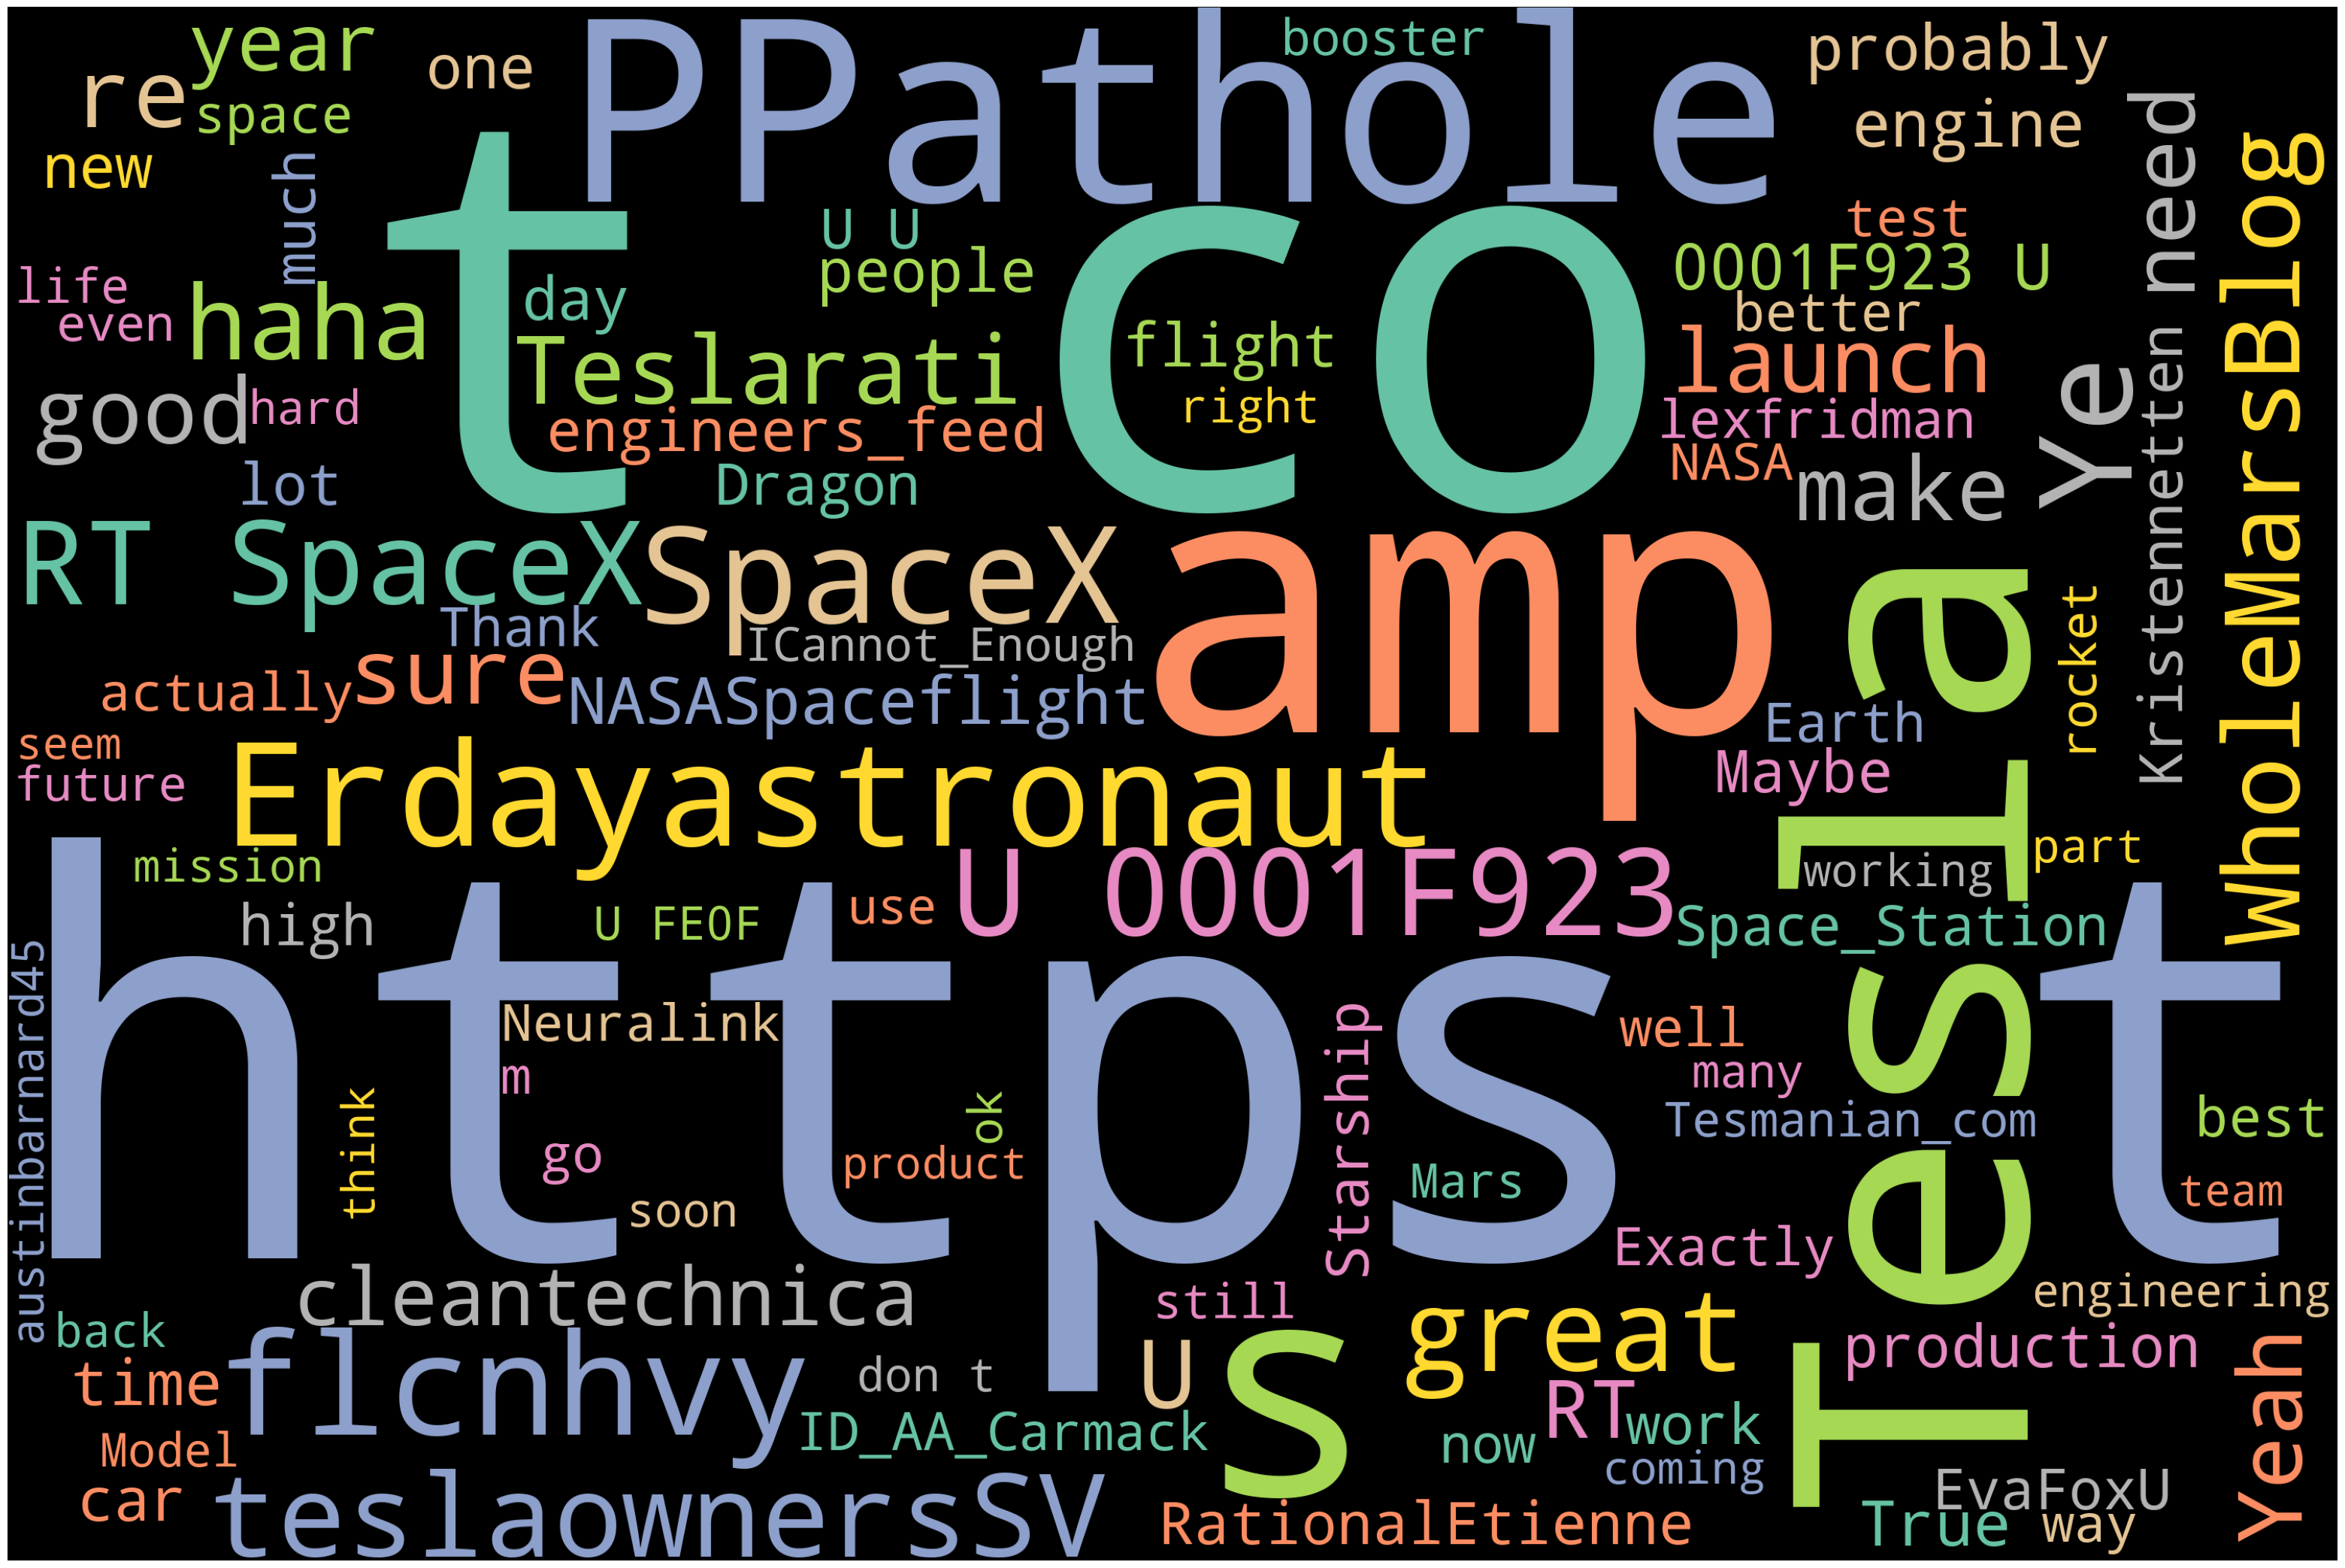

In [32]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

### Named Entity Recognition

In [33]:
#Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = clean_data
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [34]:
one_block

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

In [35]:
for token in doc_block[0:20]:
    print(token, token.pos_)

alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV


In [36]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['interview', 'congratulation', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'fail', 'thank', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse']


In [37]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,tesla,76
1,make,64
2,launch,62
3,year,49
4,work,49
5,need,48
6,go,43
7,come,42
8,day,38
9,get,37


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

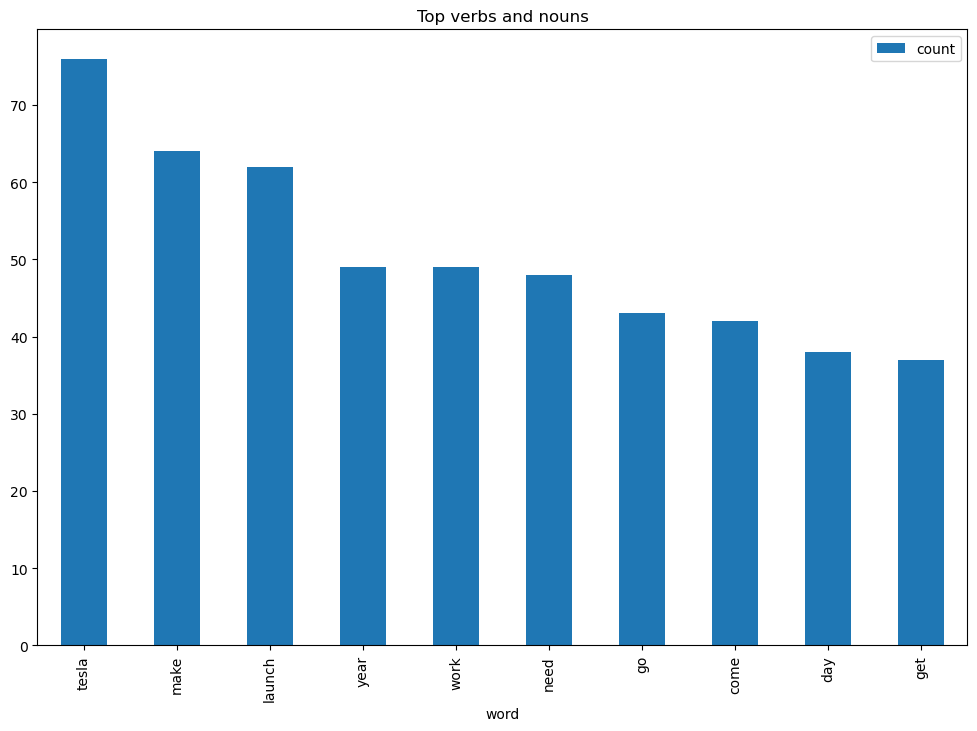

In [38]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

### Sentiment Analysis

In [39]:
from afinn import Afinn
afinn = Afinn()

In [40]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [41]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [42]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [43]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text:str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score


In [44]:
# testing that it works
calculate_sentiment(text = 'good')

3

In [45]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [46]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [47]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value'] 

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [48]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
719,We just havent observed the https://t.co/mez...,17,72


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [51]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [52]:
sent_df[sent_df['sentiment_value']>0].head()

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38


In [53]:
sent_df['index']=range(0,len(sent_df))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

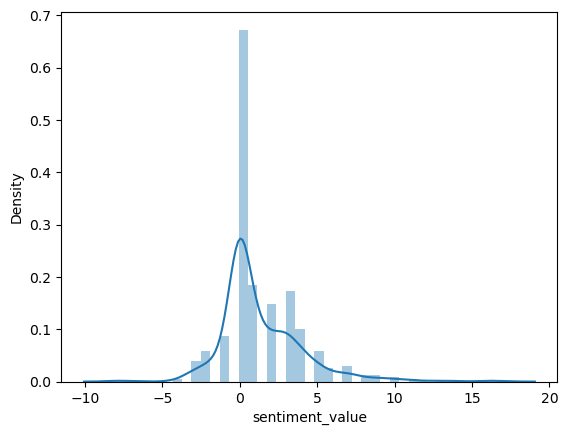

In [54]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

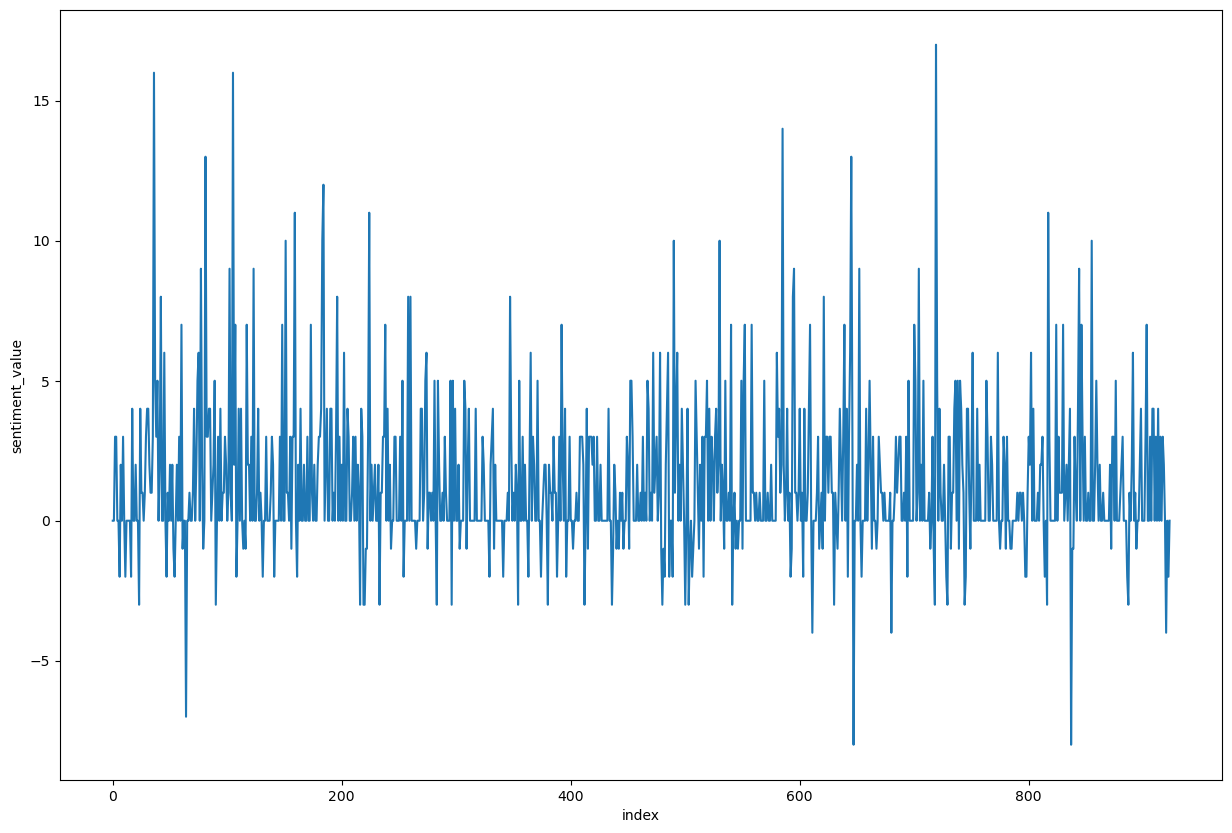

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

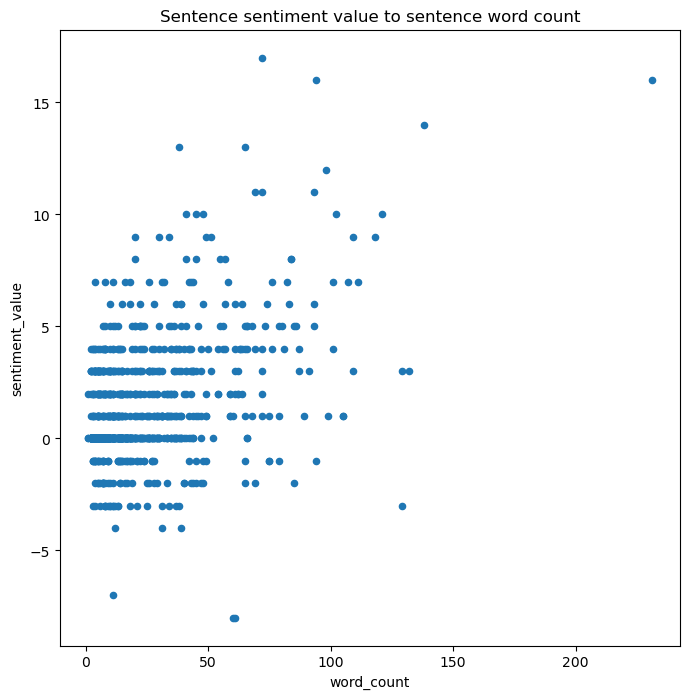

In [56]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')